<a href="https://colab.research.google.com/github/naveennekkanti1/ADOBE_Curvetopia/blob/main/ADOBE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs


In [ ]:
import matplotlib.pyplot as plt

def plot(paths_XYs, colors=None):
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * (len(paths_XYs) // 7 + 1)

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        color = colors[i % len(colors)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], color=color, linewidth=2)
    ax.set_aspect('equal')
    plt.show()


In [ ]:
from skimage.transform import probabilistic_hough_line

def detect_lines(image):
    lines = probabilistic_hough_line(image, threshold=10, line_length=5, line_gap=3)
    return lines


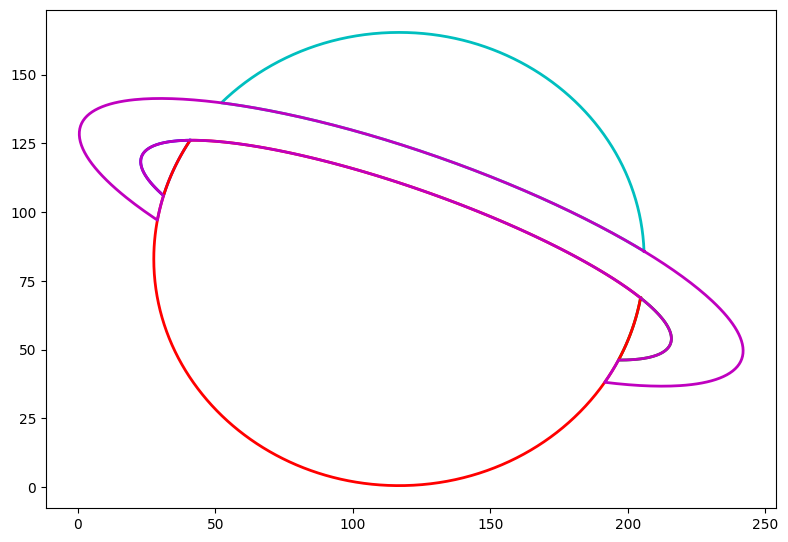

In [ ]:
def detect_symmetry(XY):
    # Implement your symmetry detection logic here
    pass

# Example use-case for the above functions
paths_XYs = read_csv("/content/occlusion2.csv")
plot(paths_XYs)


In [ ]:
from scipy.interpolate import splprep, splev

def complete_curve(points):
    tck, u = splprep([points[:, 0], points[:, 1]], s=0)
    new_points = splev(u, tck)
    return np.array(new_points).T


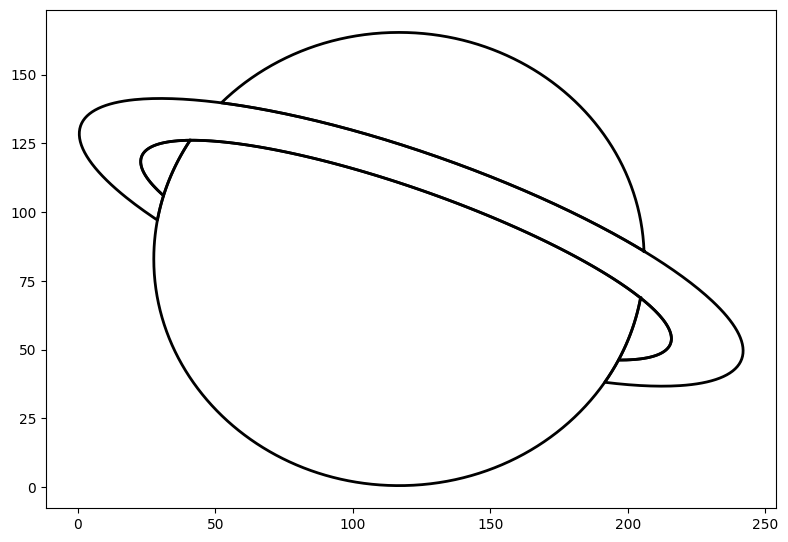

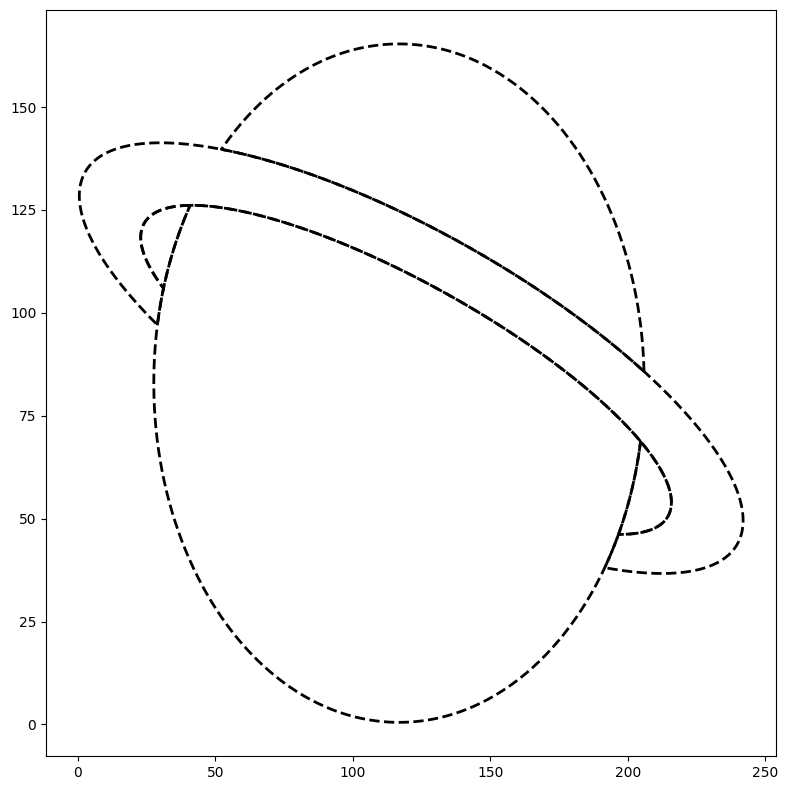

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, colors=None):
    if colors is None:
        colors = ['k'] * len(paths_XYs)  # Use black color for all paths

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        color = colors[i % len(colors)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], color=color, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

def complete_curve(points):
    tck, u = splprep([points[:, 0], points[:, 1]], s=0)
    new_points = splev(u, tck)
    return np.array(new_points).T

# Load and plot a test file
paths_XYs = read_csv("/content/occlusion2.csv")
plot(paths_XYs)

# Detect and complete curves
fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
for path in paths_XYs:
    for XY in path:
        completed_curve = complete_curve(XY)
        # Plot the completed curve in dashed black line
        ax.plot(completed_curve[:, 0], completed_curve[:, 1], 'k--', linewidth=2)

plt.show()


SyntaxError: invalid character '’' (U+2019) (<ipython-input-9-c213c4e4519b>, line 11)

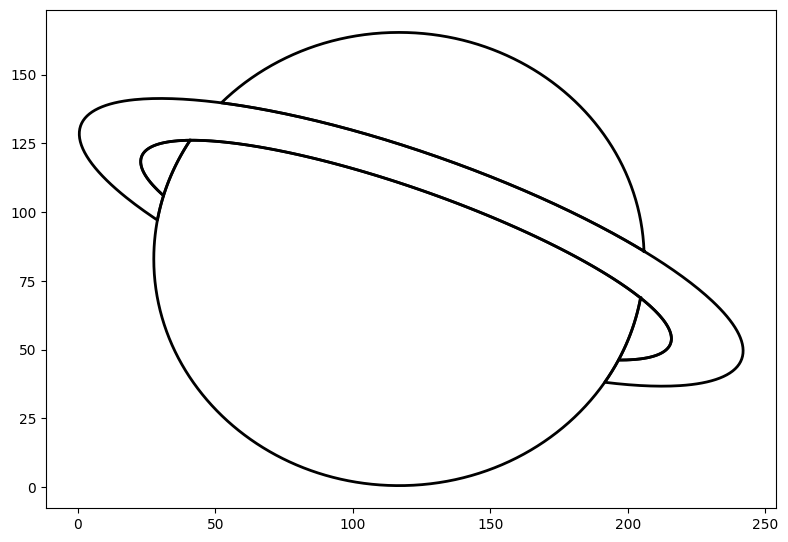

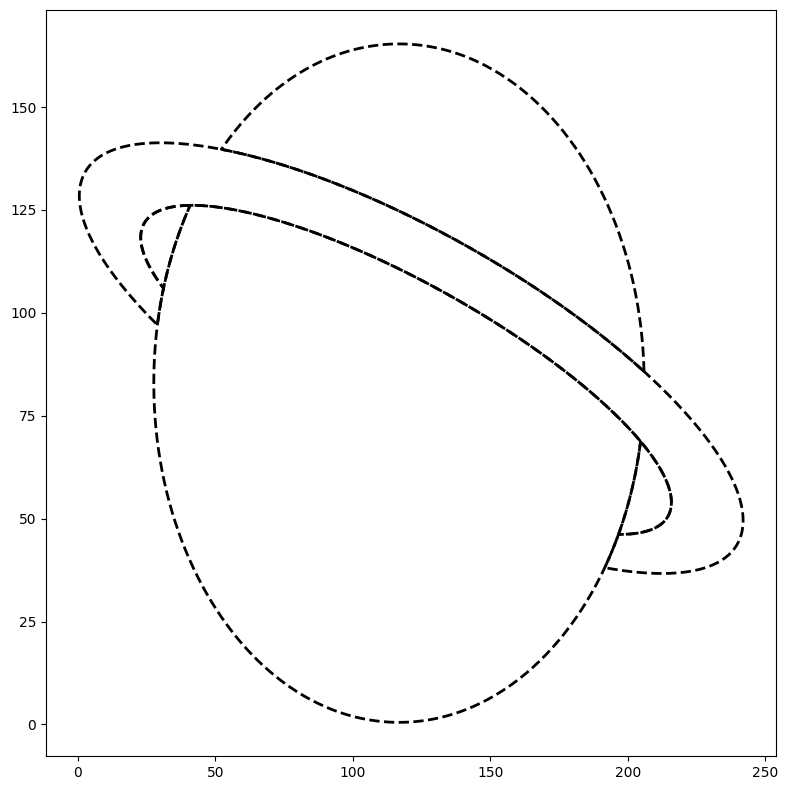

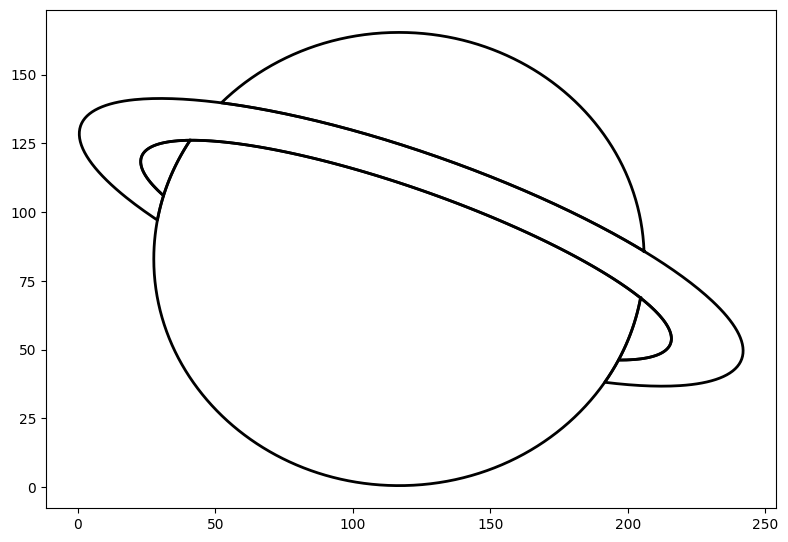

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import os

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs, colors=None):
    if colors is None:
        colors = ['k'] * len(paths_XYs)  # Use black color for all paths

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        color = colors[i % len(colors)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], color=color, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

def complete_curve(points):
    tck, u = splprep([points[:, 0], points[:, 1]], s=0)
    new_points = splev(u, tck)
    return np.array(new_points).T

def save_csv(paths_XYs, output_csv_path):
    data = []
    for path_id, path in enumerate(paths_XYs):
        for subpath_id, XY in enumerate(path):
            for point in XY:
                data.append([path_id, subpath_id, point[0], point[1]])
    np.savetxt(output_csv_path, data, delimiter=',', fmt='%d,%d,%f,%f')

def main(input_csv_path):
    # Load and plot the input file
    paths_XYs = read_csv(input_csv_path)
    plot(paths_XYs)

    # Detect and complete curves
    completed_paths_XYs = []
    for path in paths_XYs:
        completed_path = []
        for XY in path:
            completed_curve = complete_curve(XY)
            completed_path.append(completed_curve)
        completed_paths_XYs.append(completed_path)

    # Plot completed curves
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for path in completed_paths_XYs:
        for XY in path:
            # Plot the completed curve in dashed black line
            ax.plot(XY[:, 0], XY[:, 1], 'k--', linewidth=2)

    # Plot original curves in black again for reference
    plot(paths_XYs, colors=['k'])

    plt.show()

    # Generate output file name by appending "_sol" before the file extension
    base_name, ext = os.path.splitext(input_csv_path)
    output_csv_path = base_name + "_sol" + ext

    # Save completed curves to CSV
    save_csv(completed_paths_XYs, output_csv_path)

# Run the main function with the input file
main("/content/occlusion2.csv")
